In [1]:
import os
import sys
from sparclur import RollBack
from sparclur.utils import image_highlight
from sparclur.parsers import MuPDF
import re

In [2]:
invoice = os.path.join(sys.prefix, 'etc', 'sparclur', 'resources', 'AH20210114-modified.pdf')
#If the above does not load try the below. Otherwise any path to a PDF can be used here.
# invoice = os.path.join(site.USER_BASE, 'etc', 'sparclur', 'resources', 'AH20210114-modified.pdf')

### Roll Back allows for exploring a documents incremental updates.

In [3]:
roll_back = RollBack(invoice)

In [4]:
roll_back.contains_updates

True

In [5]:
roll_back.num_versions

2

<hr>

### The following graph is a stacked bar graph showing the number of added/subtracted tokens between consecutive versions. This particular document only has 3 tokens subtracted from version 0 to 1.

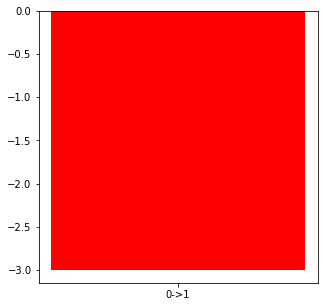

In [6]:
roll_back.compare_text(display_height=5, display_width=5)

<hr>

### The next plot is the rendering similarity of each page over consecutive versions. Since there is only one update and one page, there is only a single score to display.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.78s/it]


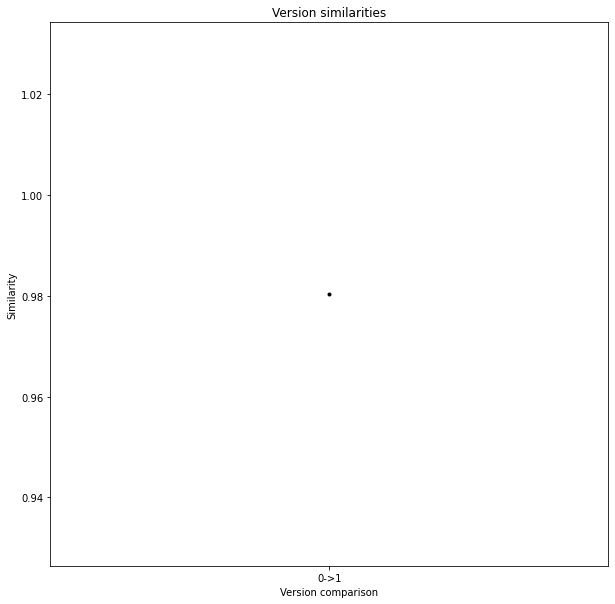

In [7]:
roll_back.compare_renders()

<hr>

### Let's see if we can highlight the difference.

In [8]:
version_0 = roll_back.get_version(0)
version_1 = roll_back.get_version(1)

In [9]:
mu_render_0 = MuPDF(version_0, dpi=200).get_renders(0)
mu_render_1 = MuPDF(version_1, dpi=200).get_renders(0)

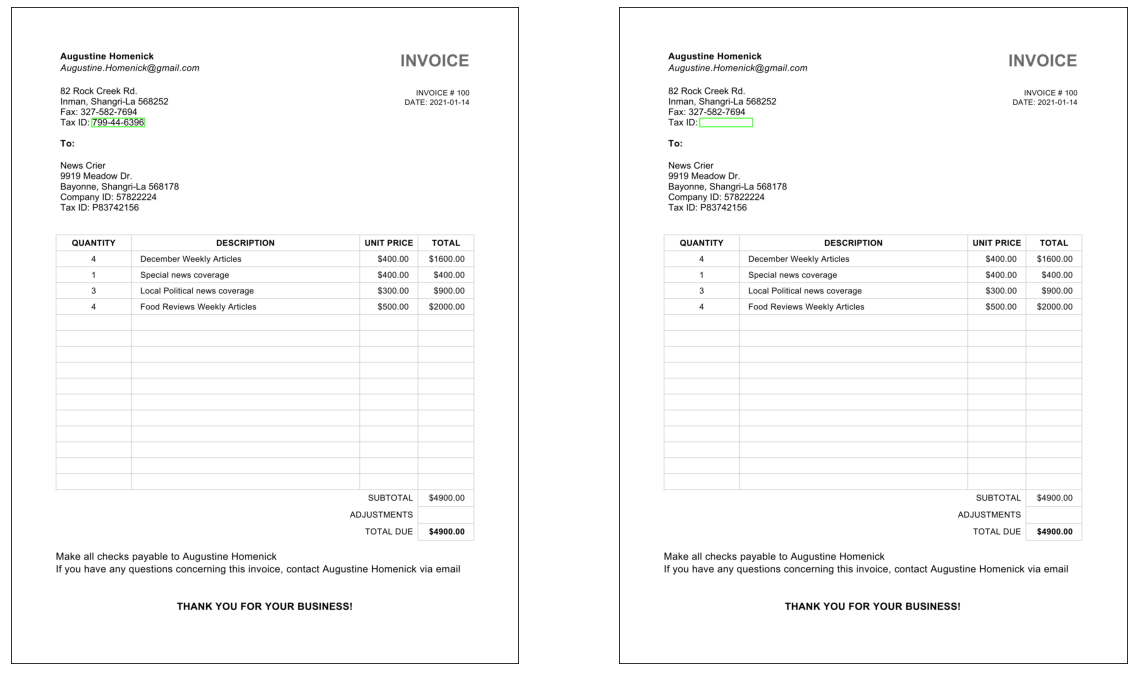

In [10]:
image_highlight(mu_render_0, mu_render_1, info_loss=.01, display_height=15, display_width=20)

<hr>

### The Tax ID was removed between the 2 versions. Let's retrieve it with text extraction.

In [11]:
v0_text = set(re.split(r'\s+', MuPDF(version_0).get_text(0)))
v1_text = set(re.split(r'\s+', MuPDF(version_1).get_text(0)))

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [12]:
v0_text.difference(v1_text)

{'799-44-6396'}